### 가설 세우기
- 해외 온라인 쇼핑 구매가 늘었을까?
(해외 판매액은 증가)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

if os.name == "nt":
    sns.set(font="Malgun Gothic")
elif os.name == "posix":
    sns.set(fond="AppleGothic")

In [3]:
%config lnlineBacked.figure_format = 'retina'

### 데이터 불러오기

In [4]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접구매액_20200914211853.csv", encoding="cp949")
df_raw.shape

(150, 28)

In [5]:
df_raw["국가(대륙)별"].value_counts()

일본            15
합계            15
아세안(ASEAN)    15
기타            15
중국            15
미국            15
대양주           15
중동            15
EU            15
중남미           15
Name: 국가(대륙)별, dtype: int64

In [6]:
df_raw.head()

,국가(대륙)별,상품군별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,...,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4
0,합계,합계,378879,382844,375879,509530,422330,392028,389071,497955,...,692111,687218,695752,896621,905483,889921,842000,998645,979275,914460
1,합계,컴퓨터 및 주변기기,7857,7232,8767,12159,11401,10575,8149,13115,...,12527,12543,11321,17197,13180,10493,9408,17055,12347,11165
2,합계,가전·전자·통신기기,18924,18173,23375,42605,31703,28755,29152,50393,...,102167,98533,98704,151967,141787,111914,97834,111482,90801,73821
3,합계,소프트웨어,905,949,899,1250,1254,1018,1171,1472,...,2863,2665,2665,3045,3107,2975,3324,3486,3191,3572
4,합계,서 적,2954,2345,2746,2827,3367,3163,3424,4094,...,5490,4811,5474,5570,5704,5546,5213,5912,6480,5855


### 분석과 시각화를 위한 tidy data 만들기

In [7]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별"], var_name="기간", value_name="백만원")
df.shape

(3900, 4)

In [8]:
df.head()

,국가(대륙)별,상품군별,기간,백만원
0,합계,합계,2014 1/4,378879
1,합계,컴퓨터 및 주변기기,2014 1/4,7857
2,합계,가전·전자·통신기기,2014 1/4,18924
3,합계,소프트웨어,2014 1/4,905
4,합계,서 적,2014 1/4,2954


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 4 columns):
국가(대륙)별    3900 non-null object
상품군별       3900 non-null object
기간         3900 non-null object
백만원        3900 non-null object
dtypes: object(4)
memory usage: 122.0+ KB


### 데이터 전처리

#### 기간에서 연도를 분리하기

<lambda 함수 : 정의 없이 간단하게 만드는 익명의 함수>
- 여러번 사용하지 않을 식을 만들 때 사용 - 필요한 곳에서만 사용하고 버릴 수 있는 함수

<map 함수 : 리스트의 모든 요소를 function에 넣어서 나온 값들을 다시 리스트로 넣은 것

사용 예) 
- map(lambda x: x=1, L)
- f = lambda x,y : x+y


* int() : 문자열 형태의 정수나 수치형 자료의 실수 등을 정수 형태로 돌려주는 함수
* split() : 문자열을 구분자 단위로 잘라 리스트 안에 넣어준다. / 기본값은 공백

In [10]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,기간,백만원,연도
0,합계,합계,2014 1/4,378879,2014
1,합계,컴퓨터 및 주변기기,2014 1/4,7857,2014
2,합계,가전·전자·통신기기,2014 1/4,18924,2014
3,합계,소프트웨어,2014 1/4,905,2014
4,합계,서 적,2014 1/4,2954,2014


In [11]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,기간,백만원,연도,분기
0,합계,합계,2014 1/4,378879,2014,1
1,합계,컴퓨터 및 주변기기,2014 1/4,7857,2014,1
2,합계,가전·전자·통신기기,2014 1/4,18924,2014,1
3,합계,소프트웨어,2014 1/4,905,2014,1
4,합계,서 적,2014 1/4,2954,2014,1


In [12]:
df.isnull().sum()

국가(대륙)별    0
상품군별       0
기간         0
백만원        0
연도         0
분기         0
dtype: int64

### 시각화

In [13]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)

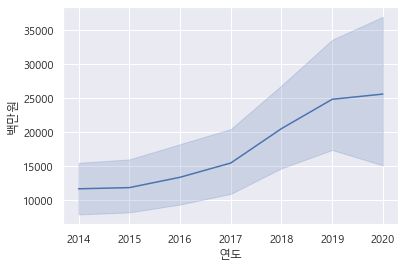

In [14]:
sns.lineplot(data=df, x="연도", y="백만원")

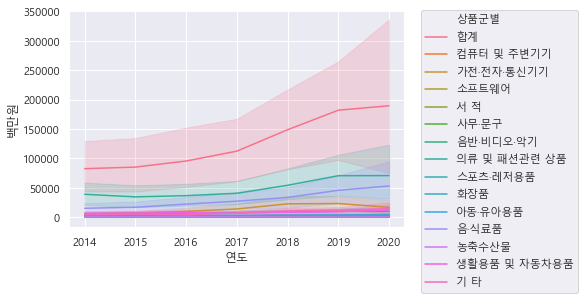

In [15]:
sns.lineplot(data=df, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

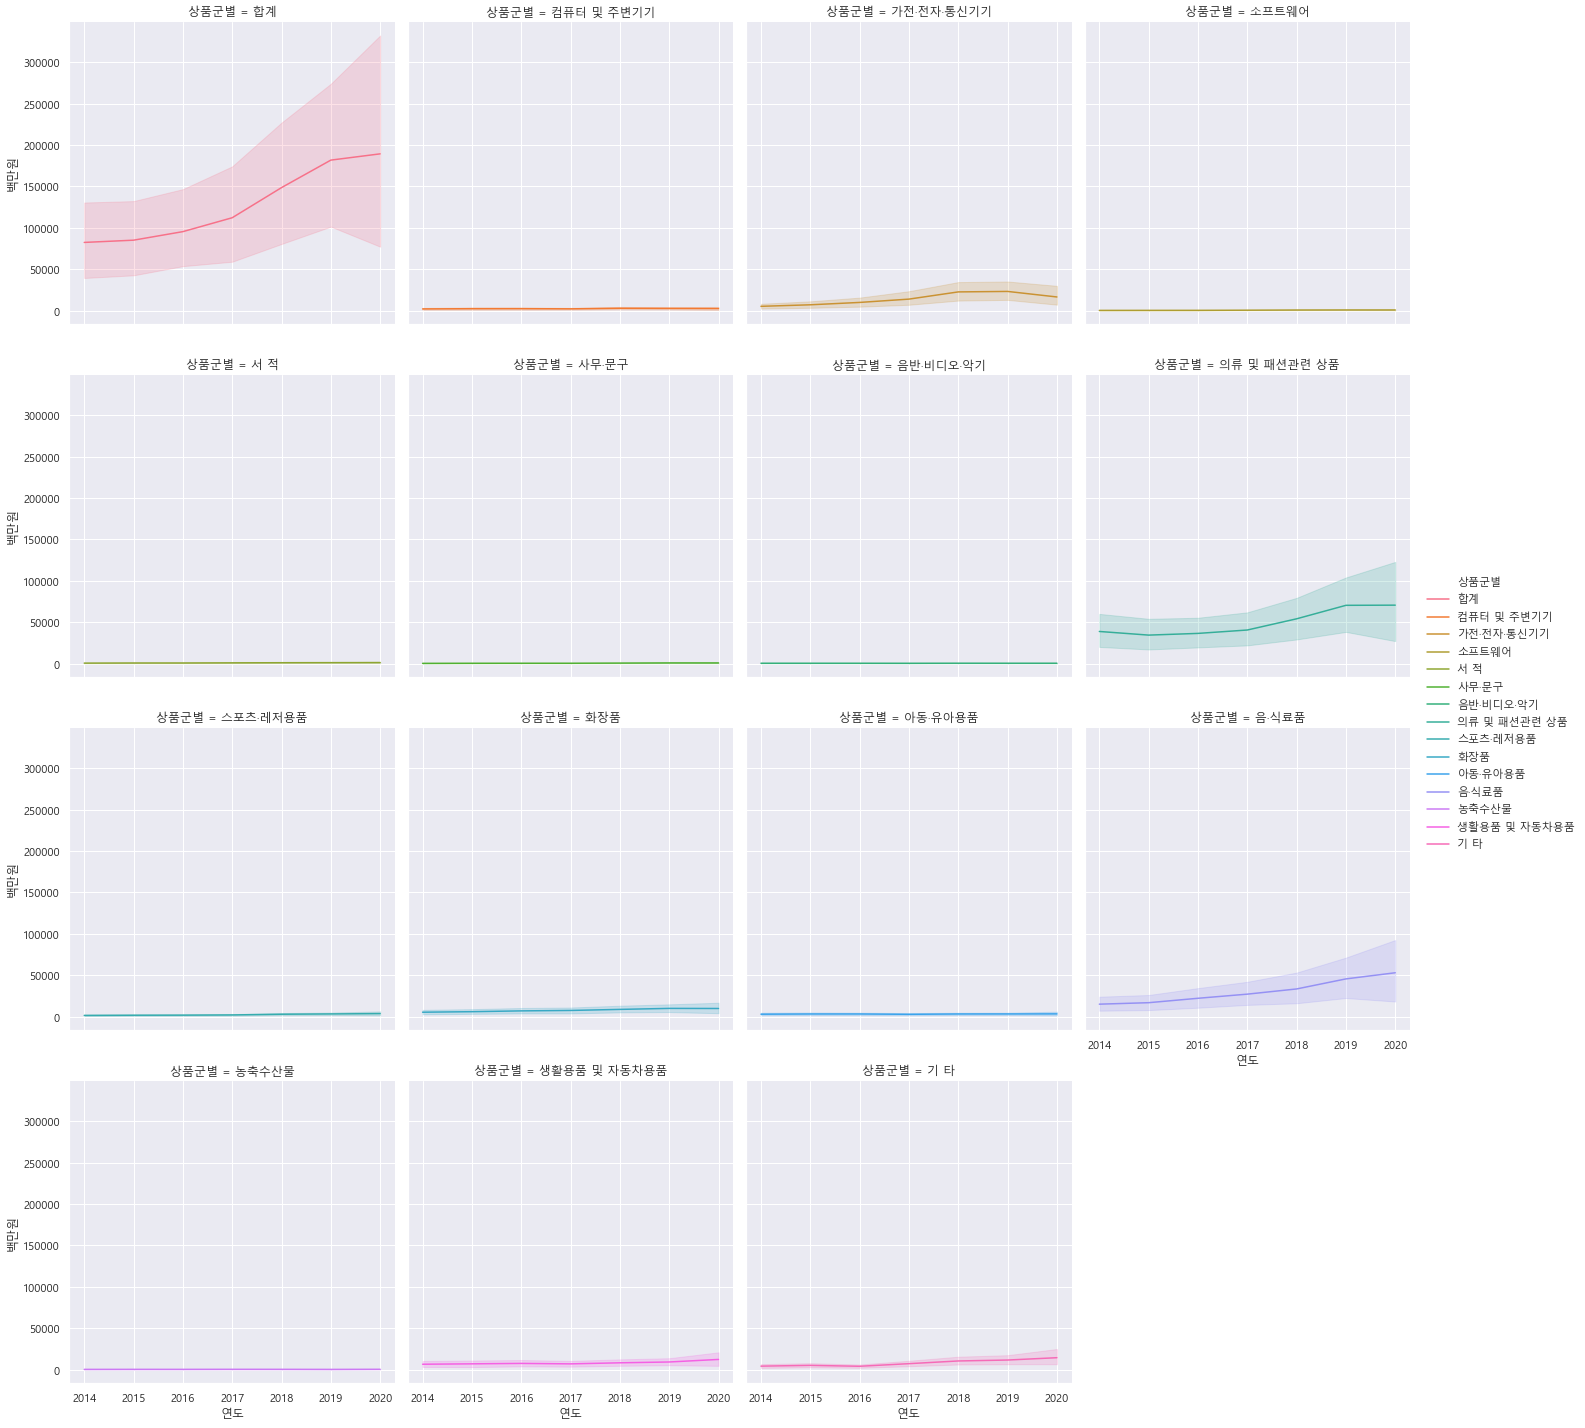

In [16]:
sns.relplot(data=df, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [17]:
df_fashion = df[df["상품군별"] == "의류 및 패션관련 상품"].copy()
df_fashion["상품군별"].unique()

array(['의류 및 패션관련 상품'], dtype=object)

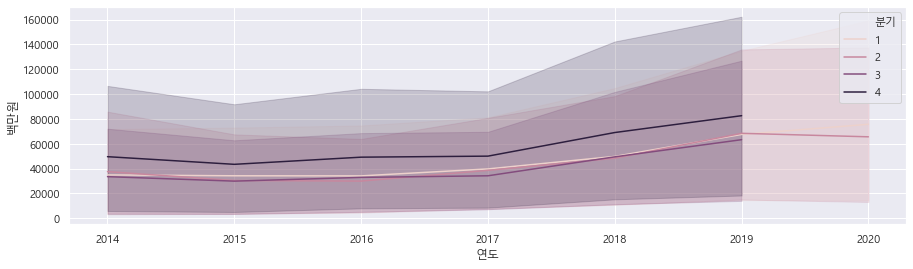

In [18]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_fashion, x="연도", y="백만원", hue="분기")

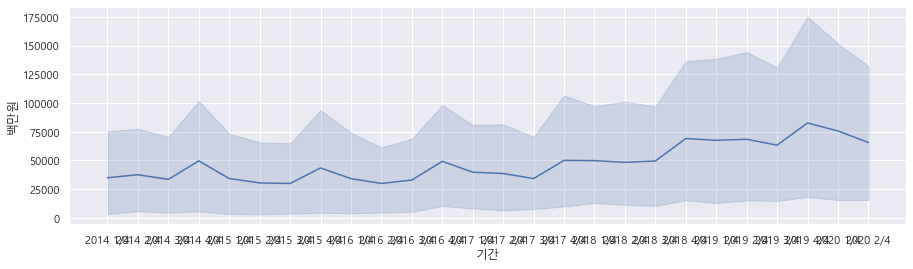

In [19]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_fashion, x="기간", y="백만원")

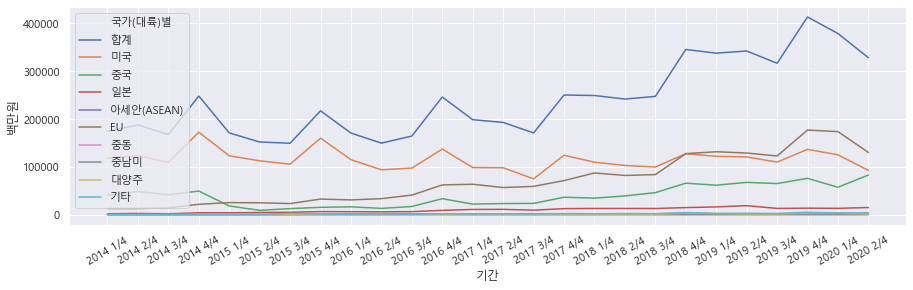

In [20]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

In [21]:
df_japan = df[df["국가(대륙)별"] == "일본"].copy()
df_japan.head()

,국가(대륙)별,상품군별,기간,백만원,연도,분기
45,일본,합계,2014 1/4,9998.0,2014,1
46,일본,컴퓨터 및 주변기기,2014 1/4,777.0,2014,1
47,일본,가전·전자·통신기기,2014 1/4,1063.0,2014,1
48,일본,소프트웨어,2014 1/4,247.0,2014,1
49,일본,서 적,2014 1/4,365.0,2014,1


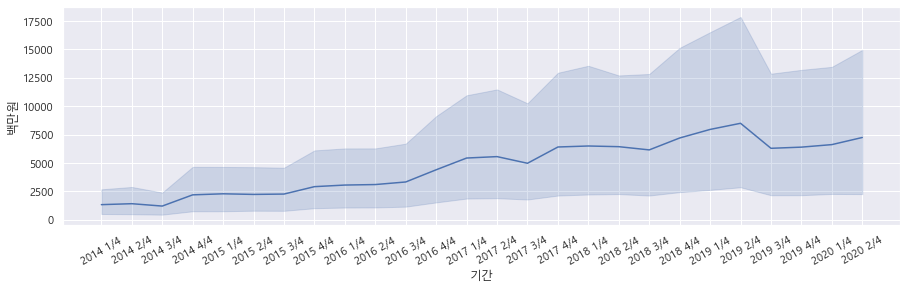

In [22]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_japan, x="기간", y="백만원")

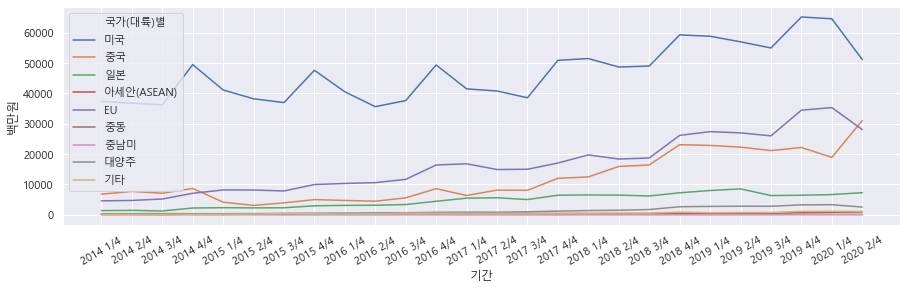

In [23]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df[df["국가(대륙)별"] != "합계"], x="기간", y="백만원", hue="국가(대륙)별", ci=None )

In [24]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result.head()

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
EU,61388.0,105599.0,167103.0,250350.0,380054.0,559303.0,303346.0
기타,863.0,4703.0,4842.0,6745.0,10832.0,12892.0,7458.0
대양주,545.0,760.0,1184.0,2577.0,5932.0,8210.0,4299.0
미국,522641.0,500548.0,442791.0,395242.0,439149.0,488488.0,217308.0
아세안(ASEAN),586.0,1699.0,5903.0,7289.0,7016.0,7039.0,5077.0


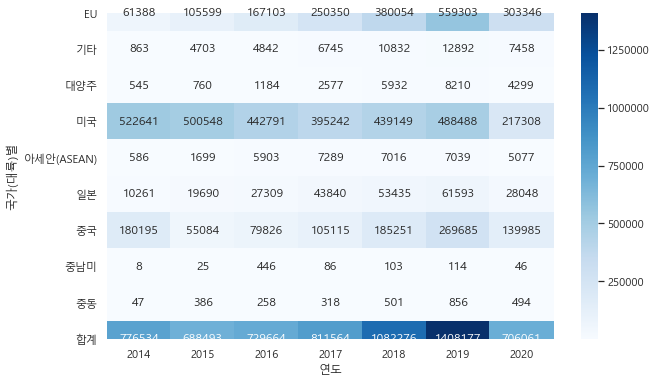

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap="Blues",annot=True, fmt=".0f")

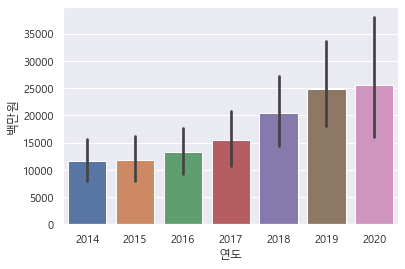

In [26]:
sns.barplot(data=df, x="연도", y="백만원")